**FINAL ASSIGNMENT: FACT FILTER USING NLP**


---



# Data Loading & Exploring

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)
trueDf = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv')
fakeDf = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv')

Path to dataset files: /kaggle/input/fake-news-detection-datasets


In [6]:
trueDf.head(7)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"


In [9]:
trueDf.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [8]:
fakeDf.head(7)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"


In [10]:
fakeDf.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [11]:
#Generating a column label to classify true and false rows and then concatenating both datasets
trueDf['label'] = 1
fakeDf['label'] = 0
data = pd.concat([trueDf, fakeDf])

In [12]:
data.head() #First is TrueDf

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
data.tail() # At last is FakeDf

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [14]:
data.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


/tmp/ipython-input-17-2245766562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette=['#987654','#234567'])


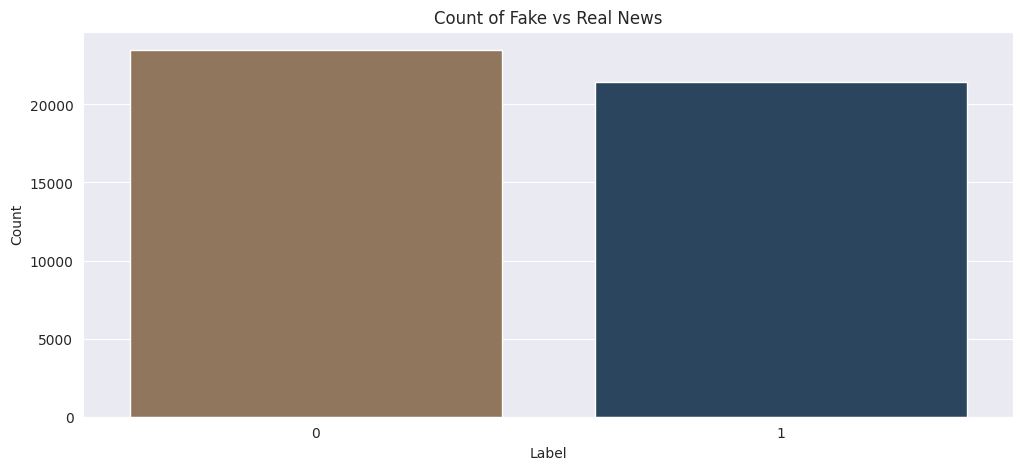

In [17]:
#to check whether our data is balanced or not via checking number of fake and real news via countplot
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=data, palette=['#987654','#234567'])
plt.title('Count of Fake vs Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
#as usual our data was approximately balanced for testing

/tmp/ipython-input-18-257924720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject',data=data,palette = 'muted');


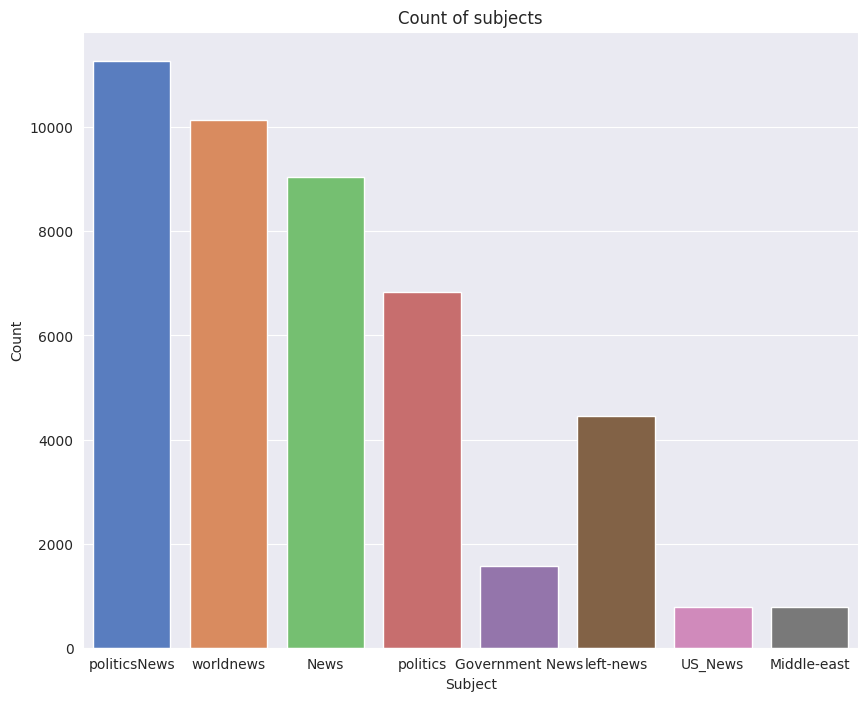

In [18]:
#classifying news as per subjects
data['subject'].value_counts()
plt.figure(figsize = (10,8))
sns.set_style("darkgrid")
sns.countplot(x='subject',data=data,palette = 'muted');
plt.title('Count of subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-19-4123694854.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels())


[Text(0, 0, '0'), Text(1, 0, '1')]

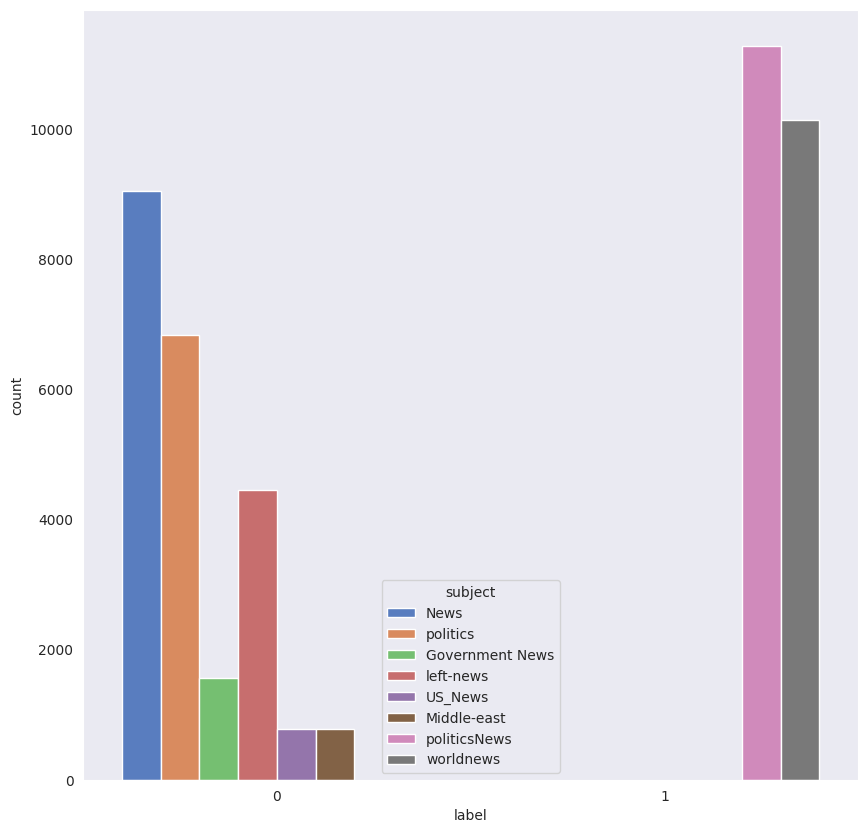

In [19]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels())

As we can clearly see from the above bar graph that only 2 news sources are the source of real news : **worldnews & politicsnews**
while others are just propagating fake news.
It might be because our data is taken only from a small period of time. Let us concatenate title and text fields into one column and drop all other columns in data preprocessing.

# Data Preprocessimg

In [20]:
#To check for number of null values
data.isnull().sum()
#NO NULL VALUES PRESENT AS USUAL

,0
title,0
text,0
subject,0
date,0
label,0


In [21]:
data['text'] = data['title'] + " " + data['text'] # 'text' =  'title text'
data = data.drop(['title', 'subject', 'date'], axis=1) #drop others
#removing useless columns and adding text and title as one string

In [22]:
blanks=[]

for index,text in data['text'].items():
  if isinstance(text, str) and text.isspace():
    blanks.append(index)

print(len(blanks))
#THERE IS NO EMPTY STRING HERE WHICH IS FABOLUS FOR OUR MODEL

0


In [27]:
#we will use the  Natural Language Toolkit(NLTK) for natural language processing for English
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# Initialize stopwords, stemmer, and lemmatizer, will take 10min to process :(
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
    tokens_stemmed = [stemmer.stem(word) for word in tokens]
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stemmed]
    return ' '.join(tokens_lemmatized)

data['processed_text'] = data['text'].apply(preprocess_text)

In [30]:
data[['text', 'processed_text']].head(1)
#YOU CAN CLEARLY SEE OUR ELEGANTLY PROCESSED TEXT :)

,text,processed_text
0,"As U.S. budget fight looms, Republicans flip t...",budget fight loom republican flip fiscal scrip...


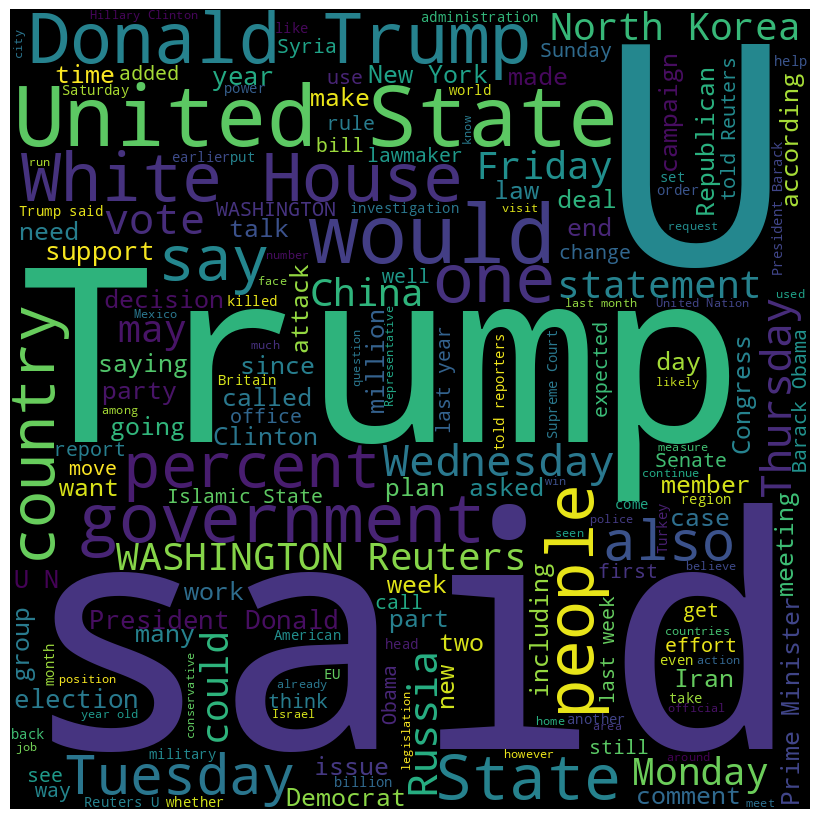

In [34]:
#WE WILL USE WORD-CLOUD REPRESENTATION TO DETERMINE MOST USED WORDS IN THIS DATA
#The stop words are removed from the data, and the word clouds are generated.
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text))

# plot the WordCloud image for genuine news data
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
#FOR REAL NEWS

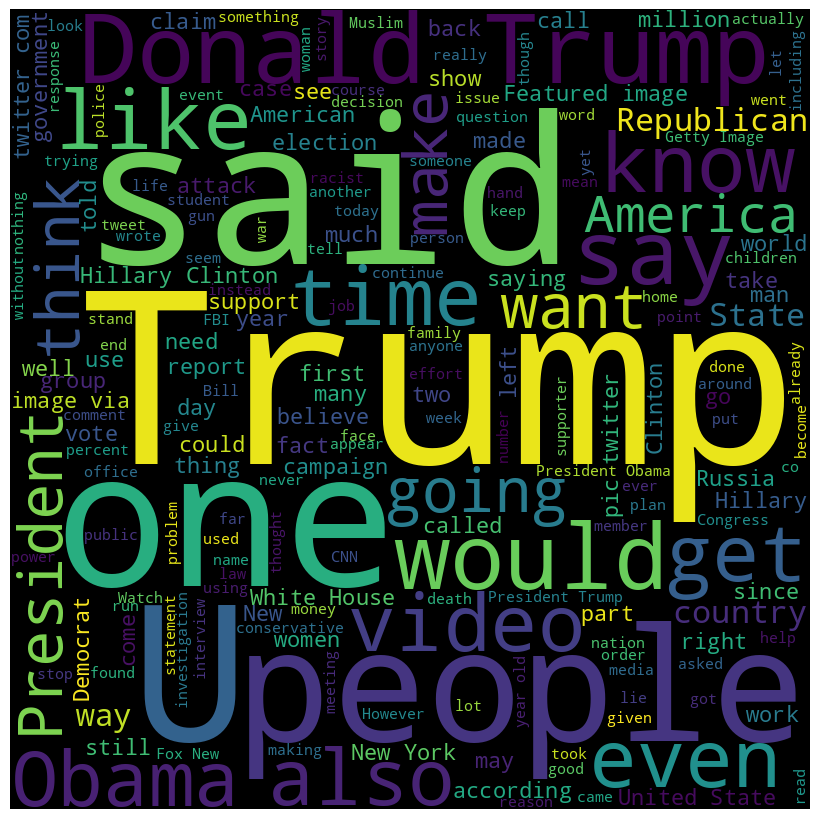

In [35]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(" ".join(data[data['label'] == 0].text))

# plot the WordCloud image for genuine news data
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
#FOR FAKE NEWS

# Model Training

In [36]:
#SPLIT DATA INTO TRAIN AND TEST : 75% TRAIN 25% TEST
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['processed_text'],data['label'],test_size=0.25, random_state = 5)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [38]:
from sklearn.svm import LinearSVC
clf=LinearSVC()

clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [39]:
from sklearn.pipeline import Pipeline
text_clf=Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("clf", LinearSVC())
    ]
)
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

# Model Evaluation

In [42]:
from sklearn.metrics import classification_report

# Make predictions
predictions = text_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5850
           1       0.99      0.99      0.99      5375

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [44]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions) * 100
print("ACCURACY SCORE: " + str(round(accuracy, 2)) + " %")


ACCURACY SCORE: 99.33 %


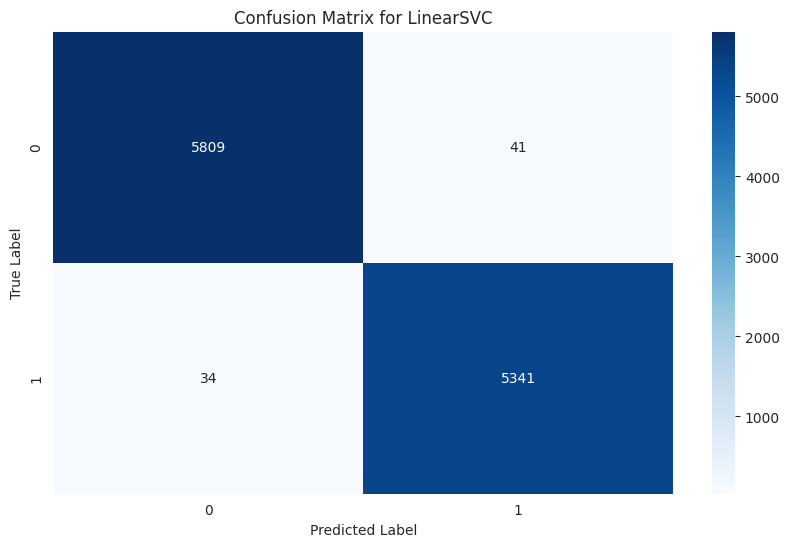

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix for LinearSVC
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LinearSVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Logistic Regression:
Accuracy: 0.9869933184855234

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5850
           1       0.98      0.99      0.99      5375

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



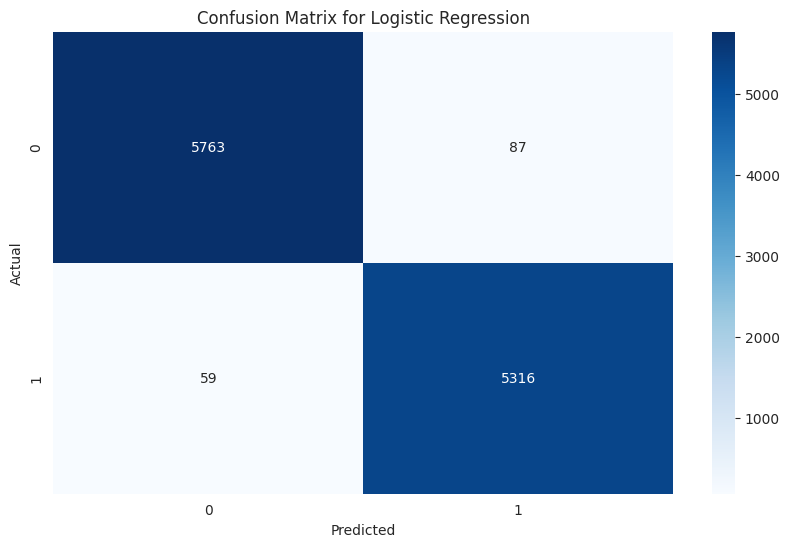

Random Forest:
Accuracy: 0.9971492204899778

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5850
           1       1.00      1.00      1.00      5375

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



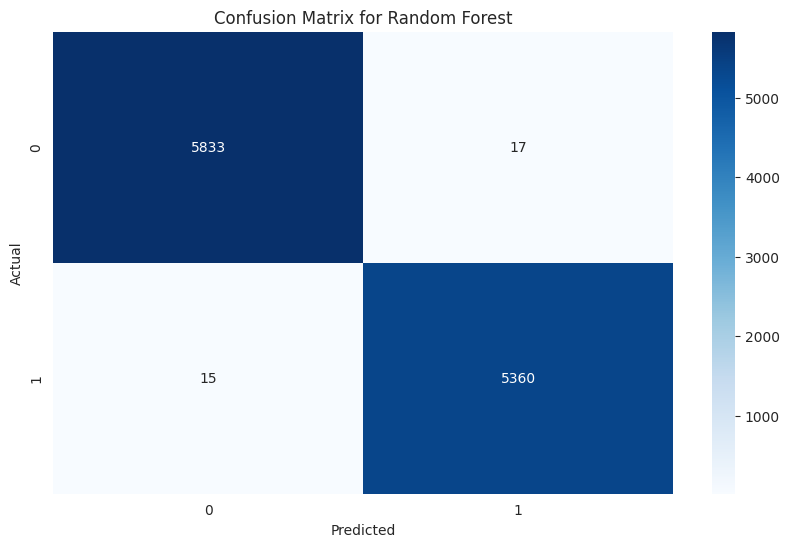

Decision Tree:
Accuracy: 0.9952783964365256

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5850
           1       1.00      0.99      1.00      5375

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



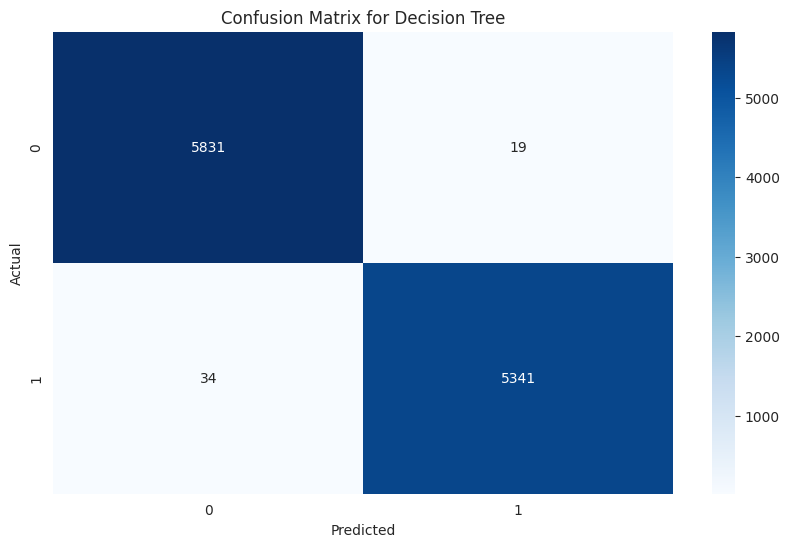

Gradient Boosting:
Accuracy: 0.9959910913140312

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5850
           1       0.99      1.00      1.00      5375

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



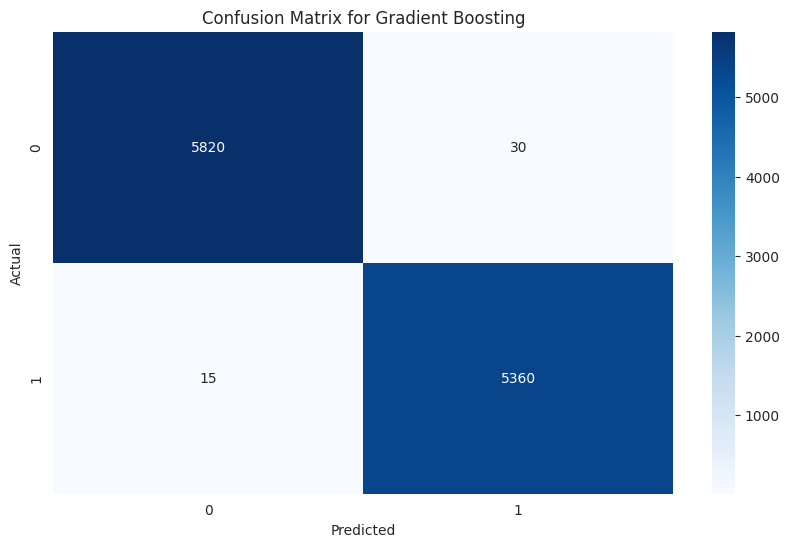

In [50]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

# Print results and plot confusion matrix
for model_name, metrics in results.items():
    print(f"{model_name}:\nAccuracy: {metrics['accuracy']}\n")
    print(metrics['classification_report'])

    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()